## K-Means Clustering

KMeans is a centroid-based algorithm that partitions data into `k` distinct clusters by minimizing the variance within each cluster.

In this section, I apply **KMeans clustering** to segment customers based on their **deal purchase behavior** and **total spending**. 

Preparing the data:
- I selected `NumDealsPurchases` and a newly created `TotalSpending` feature.
- `TotalSpending` combines all product-related spending columns to give a holistic view of customer value.
- The features are **standardized** using `StandardScaler` to ensure equal weighting in distance calculations.

The goal/application of the code in this notebook is to discover **natural groupings of customer behavior** that could inform targeted marketing strategies.


In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set theme 
sns.set_theme()
df = pd.read_csv("Datasets/marketing_campaign.csv", sep="\t")
df = df.dropna(subset=["Income"])
df["Age"] = 2025 - df["Year_Birth"]
df["TotalSpending"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)


features = [
    "Income", "Age", "Kidhome", "Teenhome", "Recency",
    "TotalSpending",  # Replaces 6 Mnt* columns
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth"
]

X = df.loc[:,['NumDealsPurchases','TotalSpending']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X)



[[   3 1617]
 [   2   27]
 [   1  776]
 ...
 [   1 1241]
 [   2  843]
 [   3  172]]


In [98]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,44,422


In [99]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpending
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,56.179603,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,132.000000,2525.000000


Let's create clusters based on two features of our data - Number of Deals Purchases and Total Spending.
We can initially explore the data to see a potential relationship:

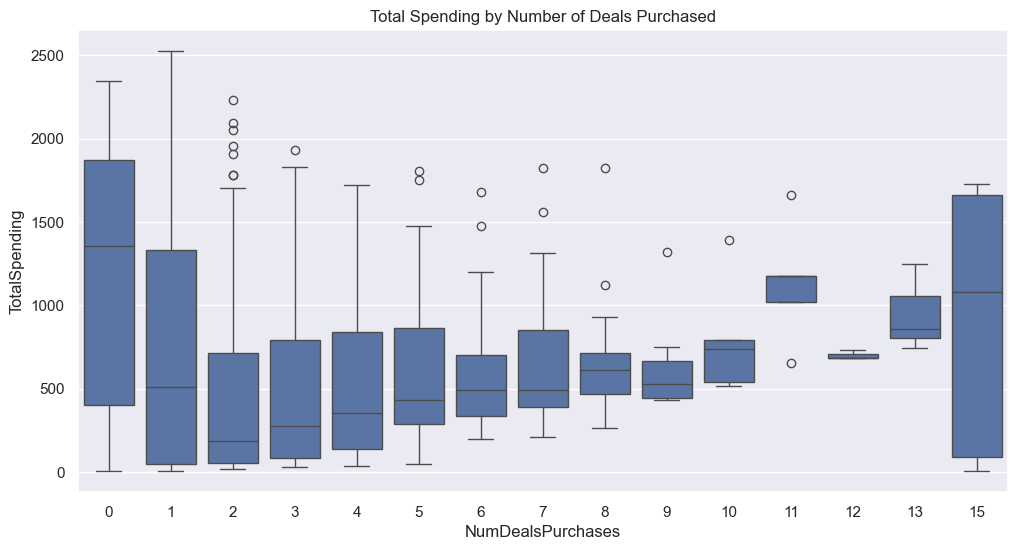

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="NumDealsPurchases", y="TotalSpending", data=df)
plt.title("Total Spending by Number of Deals Purchased")
plt.xlabel("NumDealsPurchases")
plt.ylabel("TotalSpending")
plt.show()


----
----
Let's introduce **WCSS**, or Within-Cluster Sum of Squares, a metric used in K-means clustering to evaluate the compactness of clusters.

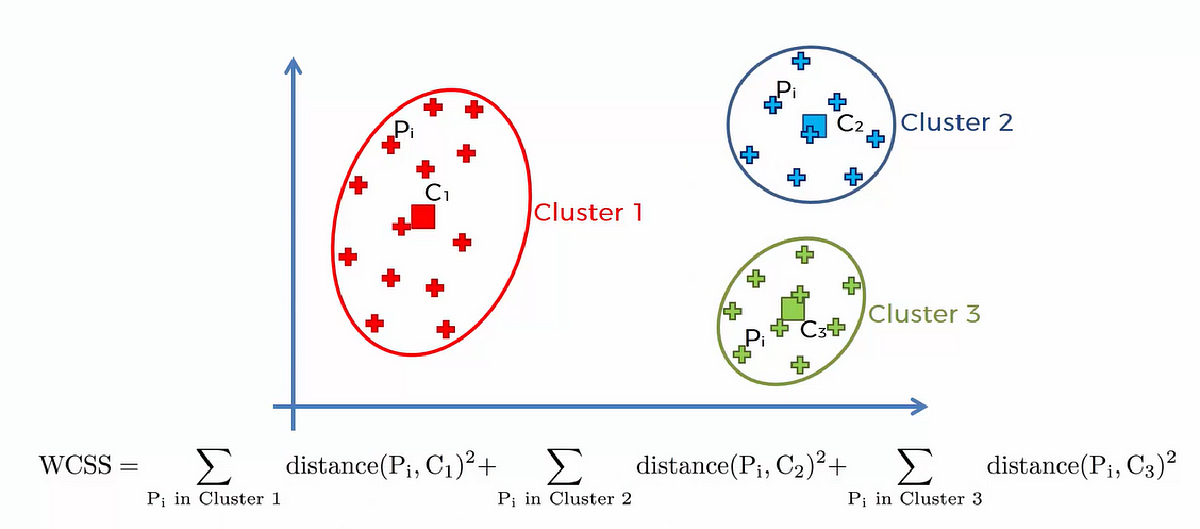

WCSS measures the sum of the squared distances between each data point within a cluster and the centroid of that cluster. 
A lower WCSS value generally indicates that the data points within a cluster are more tightly grouped around the centroid. A higher WCSS value suggests that the data points are more dispersed within their respective clusters, indicating that the clustering solution may not be as effective.

The following code will calculate the WCSS for different numbers of clusters (from 1 to 10):

In [100]:
wcss = []
for num in range(1,11):
    kmeans = KMeans(n_clusters=num, init = 'k-means++', random_state=42)
    kmeans.fit(X_scaled)

    wcss.append(kmeans.inertia_)
    #the inertia attribute is 
    # Sum of squared distances of samples to their closest cluster center
    # weighted by the sample weights if provided.

### Elbow Method ###

To determine the optimal number of clusters for a dataset, we can plot the different WCSS values for different numbers of clusters and look for an "elbow point", where the rate of WCSS' decrease significantly slows down.
With this method, we can visually identify the point where adding more clusters doesn't significantly improve the cluster compactness, which will suggest to us the optimal number of clusters (k) for the given dataset. 

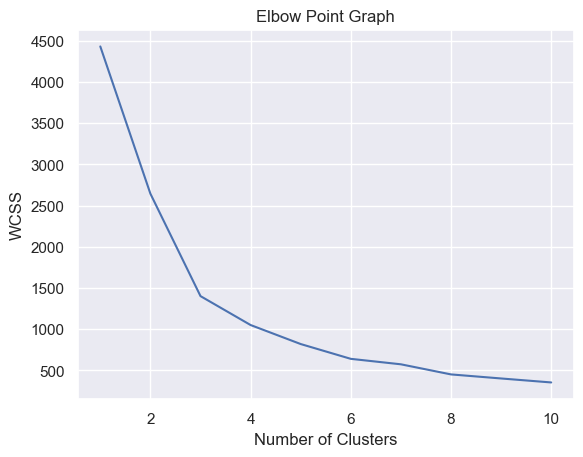

In [101]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- **WCSS** measures the compactness of clusters (lower is better).
- As `k` increases, WCSS decreases. but after a certain point, the improvement slows, and the **"elbow point"** is where the decreasing rate sharply levels off, implying that adding more clusters no longer gives substantial benefit to our model.

In our case, the elbow appears at **k=3**

---
### Training the Model



In [102]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)

Y = kmeans.fit_predict(X_scaled) #fit the model to X and return the cluster labels for each data point
print(Y)

[1 0 1 ... 1 1 0]


Let's plot all the clusters.

Text(0.5, 1.0, 'KMeans Clustering ')

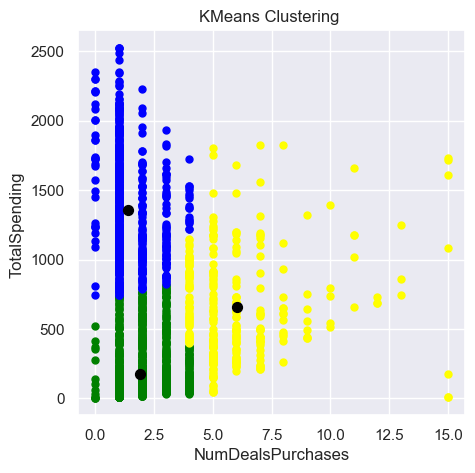

In [105]:
plt.figure(figsize = (5,5))
plt.scatter(X[Y==0,0], X[Y==0, 1], s=25, c= 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1, 1], s=25, c= 'blue', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2, 1], s=25, c= 'yellow', label = 'Cluster 3')

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_) # we're plotting with raw values on axis

plt.scatter(centroids_original[:,0], centroids_original[:,1], s=50,c='black', label='Centroids')
plt.xlabel("NumDealsPurchases")
plt.ylabel("TotalSpending ")
plt.title("KMeans Clustering ")


## Additional analysis using Silhouette Score

Another way to evaluate the quality of our clustering when using different ```k``` values is by using silhouette score analysis.

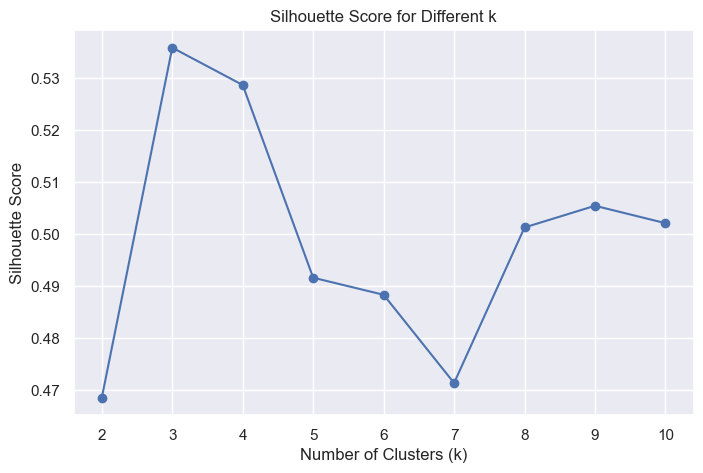

In [107]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires k >= 2
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


The silhouette score measures how well-separated and cohesive clusters are. The highest silhouette score occurred at `k = 3`, supporting our previous choice above of using 3 clusters.

# Conclusion: KMeans Clustering on Total Spending and Deal Purchases
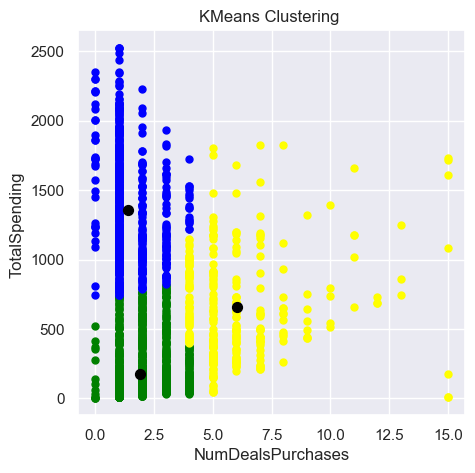
This plot visualizes the results of KMeans clustering using the features **`NumDealsPurchases`** and **`TotalSpending`**. Each point represents a customer, and the black dots represent the cluster centroids.

- The x-axis shows the number of purchases made through promotional deals.
- The y-axis represents the customer's total monetary spending.

**Observations:**
- The green cluster consists of **low-spending customers who rarely buy from deals**.
- Another cluster (blue) includes customers with **moderate spending**, often purchasing **2–4 deals**.
- The final cluster (yellow) represents **high-spending customers** who participate in **a wider range of deal engagement frequency**, so they make deal-based purchases more often.

This clustering suggests a segmentation based on both **engagement with deals** and **total value contributed**, which can help targeted marketing/business strategies.
